In [24]:
%pylab inline

pathchow='/Users/juanmendezvalderrama/Documents/Proyectos/mean_field_grant/SC_triplet'


pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Lattice
import Hamiltonian
from scipy import linalg as la
import seaborn as sns



rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 20})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [25]:
def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data

In [26]:



        
frames=[]

path=pathy+'/data/musweep_AFMcor_51_6_2022-07-14-15-22-37'

subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)



['musweep_AFMcor_51_6_0.5', 'musweep_AFMcor_51_6_0', 'musweep_AFMcor_51_6_0.75', 'musweep_AFMcor_51_6_1', 'inforun', 'musweep_AFMcor_51_6_0.25', 'musweep_AFMcor_51_6_1.25', 'musweep_AFMcor_51_6_1.5']


In [27]:
df

,T,mu,J,D,phi,theta,MZ,FSC0,FSC,FAFM0,FAFM,L
0,1.00,0.5,6.0,0.000038,0.241598,0.015671,0.000105,-8555.683397,-8555.683391,-11277.563125,-11277.563119,51.0
1,0.99,0.5,6.0,0.000062,0.241598,0.015671,0.000095,-8497.164071,-8497.164054,-11217.469009,-11217.469004,51.0
2,0.98,0.5,6.0,0.000138,0.241598,0.015671,0.000105,-8438.827832,-8438.827748,-11157.557496,-11157.557490,51.0
3,0.97,0.5,6.0,0.000138,0.758402,0.015671,0.000095,-8380.678440,-8380.678357,-11097.832381,-11097.832376,51.0
4,0.96,0.5,6.0,0.000091,0.758402,0.015756,0.000105,-8322.719747,-8322.719710,-11038.297553,-11038.297547,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.05,1.5,6.0,0.041247,8.247864,6.358164,0.000095,-8134.964414,-8135.153419,-15836.188322,-15836.188309,51.0
96,0.04,1.5,6.0,0.058950,9.389526,6.372463,0.000105,-8132.369933,-8133.358995,-15833.370737,-15833.370720,51.0
97,0.03,1.5,6.0,0.067622,9.424679,6.257009,0.000095,-8130.349534,-8132.496852,-15831.186038,-15831.186024,51.0
98,0.02,1.5,6.0,0.070935,9.426144,6.276532,0.000105,-8128.901513,-8132.229280,-15829.650899,-15829.650882,51.0


No handles with labels found to put in legend.


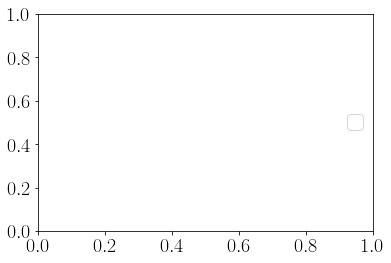

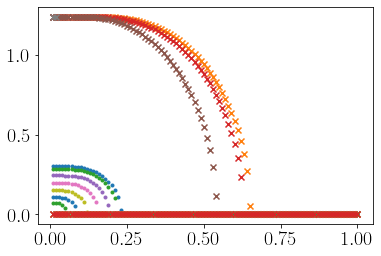

In [28]:

plt.legend(loc='right')
plt.show()

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3])
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.round(np.arange(0,1.75,.25),2)
for mm in mus:
    draw_heatmap( 'T', 'D', 'mu','.', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'MZ', 'J','x', data=df.loc[(df['mu'] == mm)])
plt.show()

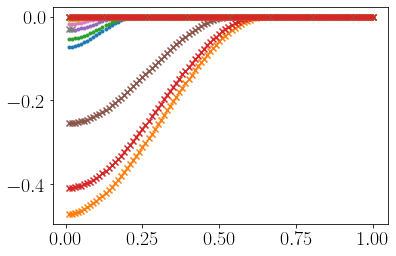

In [29]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[4]])
    plt.scatter(d1,(d2-d3)/(d4**2), marker=args[3])
    # plt.yscale('log')
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color

for mm in mus:
    draw_heatmap( 'T', 'FSC', 'FSC0', '.','L', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'FAFM', 'FAFM0', 'x','L', data=df.loc[(df['mu'] == mm)])
    
plt.show()

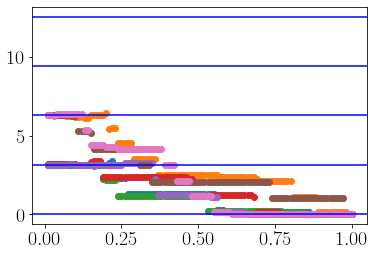

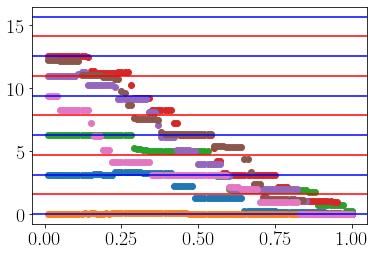

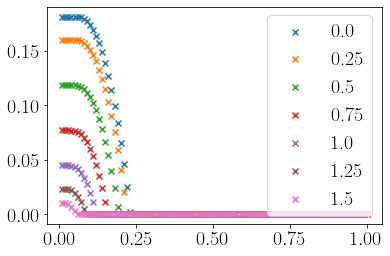

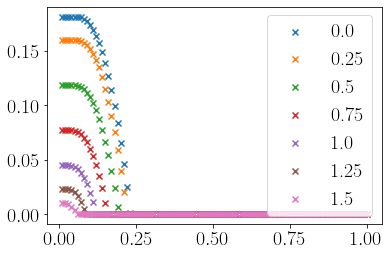

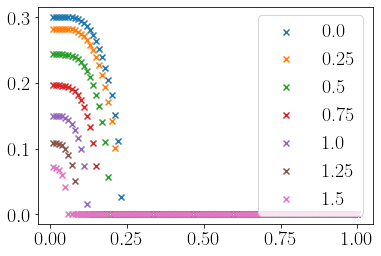

In [45]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])
    
def draw_heatmap_d(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,2*(d2**2), marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])

def draw_heatmap_phi(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,np.cos(d2)*np.sin(d2), marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])
    
def draw_heatmap_theta(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,np.sin(d2), marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])


def draw_heatmap_all_p(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    plt.scatter(d1,2*(d4**2)*(np.sin(d2)*(np.cos(d3)*np.sin(d3))+1), marker=args[4], label=str(args[5]))
    # plt.plot(d1,d2, c=d3[0])

def draw_heatmap_all_m(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    plt.scatter(d1,2*(d4**2)*(-np.sin(d2)*(np.cos(d3)*np.sin(d3))+1), marker=args[4], label=str(args[5]))
    # plt.plot(d1,d2, c=d3[0])


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color

for mm in mus:

    draw_heatmap( 'T', 'theta', 'mu','o', data=df.loc[(df['mu'] == mm)])
plt.axhline(0,c='b')
plt.axhline(np.pi,c='b')
plt.axhline(2*np.pi,c='b')
plt.axhline(3*np.pi,c='b')
plt.axhline(4*np.pi,c='b')
plt.show()


for mm in mus:

    draw_heatmap( 'T', 'phi', 'mu','o', data=df.loc[(df['mu'] == mm)])
plt.axhline(0,c='b')
plt.axhline(np.pi,c='b')
plt.axhline(2*np.pi,c='b')
plt.axhline(3*np.pi,c='b')
plt.axhline(4*np.pi,c='b')
plt.axhline(5*np.pi,c='b')


plt.axhline(np.pi/2, c='r')
plt.axhline(3*np.pi/2, c='r')
plt.axhline(5*np.pi/2, c='r')
plt.axhline(7*np.pi/2, c='r')
plt.axhline(9*np.pi/2, c='r')

plt.show()


for mm in mus:
    draw_heatmap_all_p( 'T','theta', 'phi', 'D','x',mm, data=df.loc[(df['mu'] == mm)])


plt.legend(loc='right')
plt.show()


for mm in mus:
    draw_heatmap_all_m( 'T','theta', 'phi', 'D','x',mm, data=df.loc[(df['mu'] == mm)])


plt.legend(loc='right')
plt.show()

for mm in mus:
    draw_heatmap( 'T', 'D', mm,'x', data=df.loc[(df['mu'] == mm)])


plt.legend(loc='right')
plt.show()

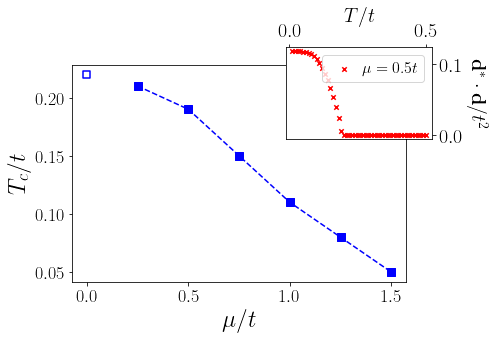

In [110]:
def obtain_Tc(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    crit=.2*np.max(d2)
    ind=np.where(d2>crit)[0]
    indlow=np.where(d2<crit)[0]
    greatT=d1[ind]
    if (np.size(greatT)>0) and (np.size(indlow)>0):
        ind2=np.argmax(greatT)
        return greatT[ind2]
    else:
        return 0
Tcs_SC_l=[]  
for mm in mus:
    Tc=obtain_Tc( 'T', 'D', data=df.loc[(df['mu'] == mm)])
    Tcs_SC_l.append(Tc)

data=df.loc[(df['mu'] == 0.5)]
d1 = np.array(data.loc[:, 'T'])
d2 = np.array(data.loc[:,'D'])


Tcs_SC=np.array(Tcs_SC)
fig, ax1 = plt.subplots(figsize = (6, 4))    
ax1.scatter(mus[1:],Tcs_SC[1:], marker='s', s=50, c='b')
ax1.plot(mus[1:],Tcs_SC[1:], c='b', ls='--')
ax1.scatter(mus[0],Tcs_SC[0], marker='s', s=50, edgecolors='b', facecolors="none",linewidth=1.5)

ax1.set_ylabel(r"$T_c/t$ ", size=24)
ax1.set_xlabel(r"$\mu/t$", size=24)

# ax1.set_xlim([0,1.5])
# ax1.set_ylim([0,0.25])

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
ax1.tick_params(axis='x', which='major', labelsize=18)
ax1.tick_params(axis='y', which='major', labelsize=18)

left, bottom, width, height = [0.62, 0.62, 0.34, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.scatter(d1[50:],2*(d2[50:])**2, marker='x', c='r',s=20, label=r"$\mu=0.5t$")
ax2.set_xlabel(r"$T/t$",labelpad=1)
ax2.xaxis.set_label_position('top') 
ax2.set_ylabel(r"$\mathbf{d}^* \cdot \mathbf{d}/t^2$", rotation=270,labelpad=25)
ax2.yaxis.set_label_position('right') 
ax2.legend(handletextpad=0.1,prop={'size':16})

# plt.tight_layout()
plt.savefig('imgs/phaseD.png', dpi=400, bbox_inches='tight')

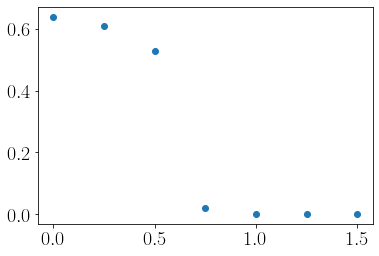

In [38]:
def obtain_Tc(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    crit=.2*np.max(d2)
    ind=np.where(d2>crit)[0]
    indlow=np.where(d2<crit)[0]
    greatT=d1[ind]
    if (np.size(greatT)>0) and (np.size(indlow)>0):
        ind2=np.argmax(greatT)
        return greatT[ind2]
    else:
        return 0
Tcs_AFM=[]  
for mm in mus:
    Tc=obtain_Tc( 'T', 'MZ', data=df.loc[(df['mu'] == mm)])
    Tcs_AFM.append(Tc)
    
plt.scatter(mus,Tcs_AFM)


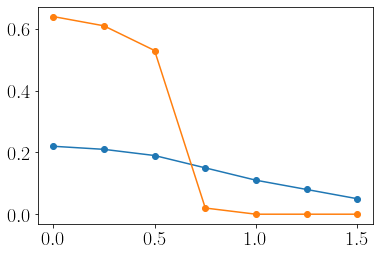

In [32]:
plt.scatter(mus,Tcs_SC)
plt.plot(mus,Tcs_SC)
plt.scatter(mus,Tcs_AFM)
plt.plot(mus,Tcs_AFM)


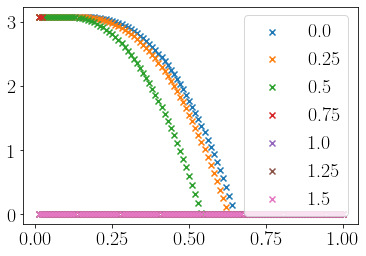

In [33]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])

for mm in mus:
    draw_heatmap_d( 'T', 'MZ', mm,'x', data=df.loc[(df['mu'] == mm)])

plt.legend(loc='right')
plt.show()